In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Import Dataset
df = pd.read_csv('fetal_health.csv')
df.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


In [4]:
df.shape


(2126, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
#Data Processing
# general info about the dataset
print("Rows     : " ,df.shape[0])
print("Columns  : " ,df.shape[1])

Rows     :  2126
Columns  :  22


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


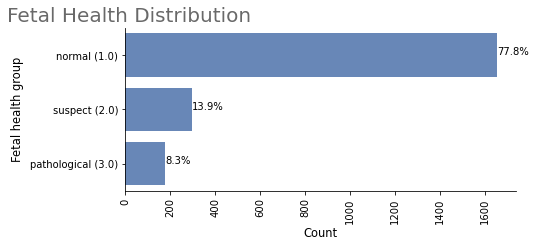

In [8]:
#Exploratary Dta Analysis
plt.figure(figsize = (7,3)) 
# create a new label for y
labels = ['normal (1.0)', 'suspect (2.0)', 'pathological (3.0)']
ax = sns.countplot(y="fetal_health", data=df, palette = ['#5B84C4'])
ax.set_yticklabels(labels)

# remove frame 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# count percentage
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90) 

# set labels
plt.title('Fetal Health Distribution', fontdict={'color':'dimgray', 'size': 20}, x=0.01, y=1.0) 
ax.yaxis.set_label_coords(-0.26,2.0)
ax.set_ylabel('Fetal health group', fontsize=11.5)
ax.xaxis.set_label_coords(1.0,-0.22)
ax.set_xlabel('Count', fontsize=11.5)
plt.show()

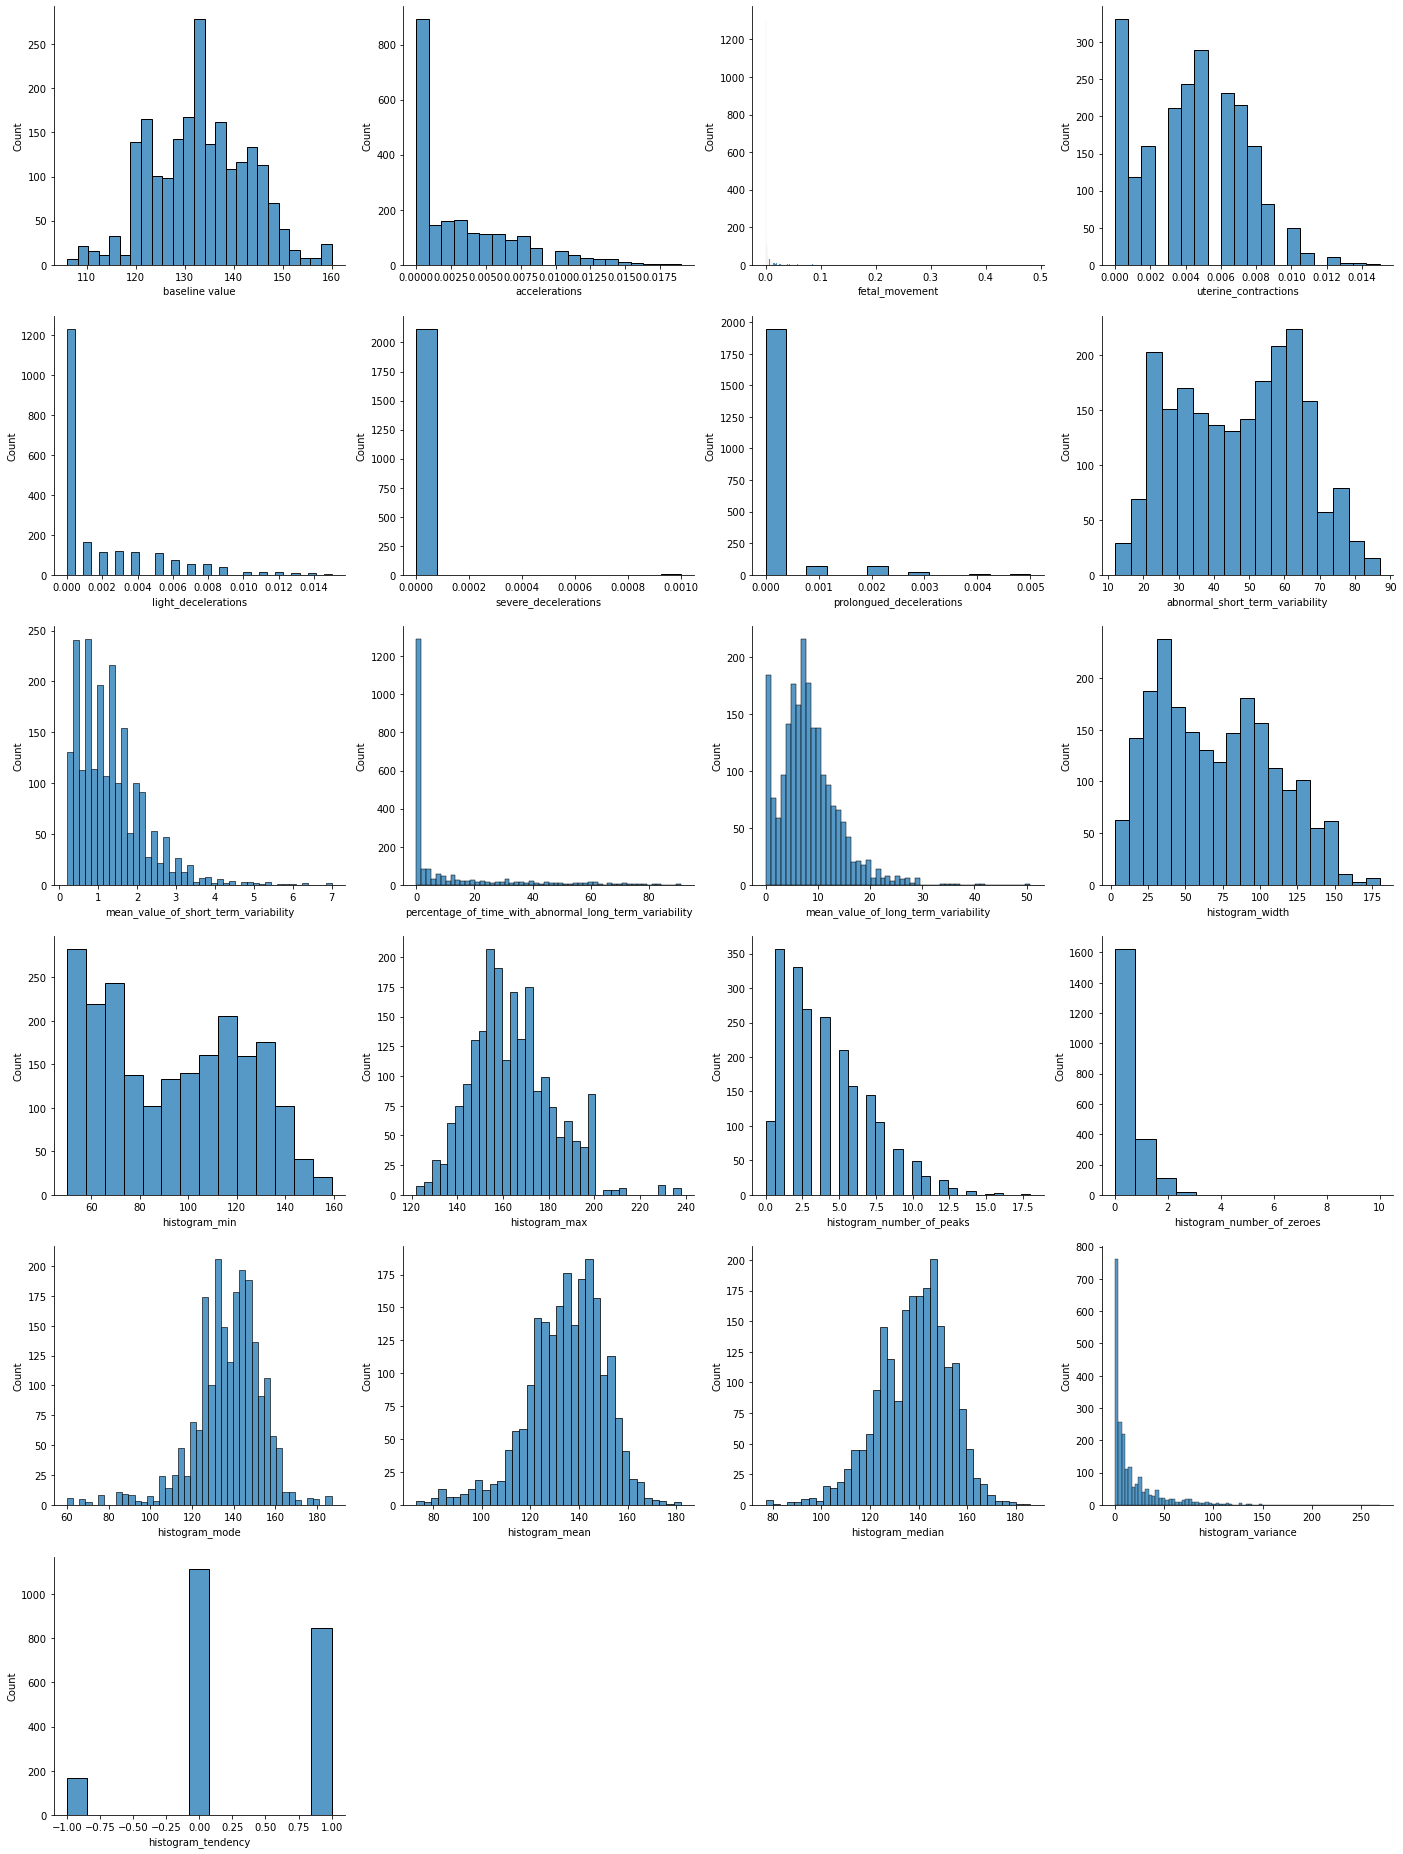

In [9]:
features = df.columns[0:21]
plt.figure(figsize = (24,250))

for i, feature in enumerate(features):
    plt.subplot(44,4,i+1)
    ax = sns.histplot(x = feature, data = df, palette = ['#5B84C4'])
    plt.xlabel(feature)
    #remove top and right frame 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()

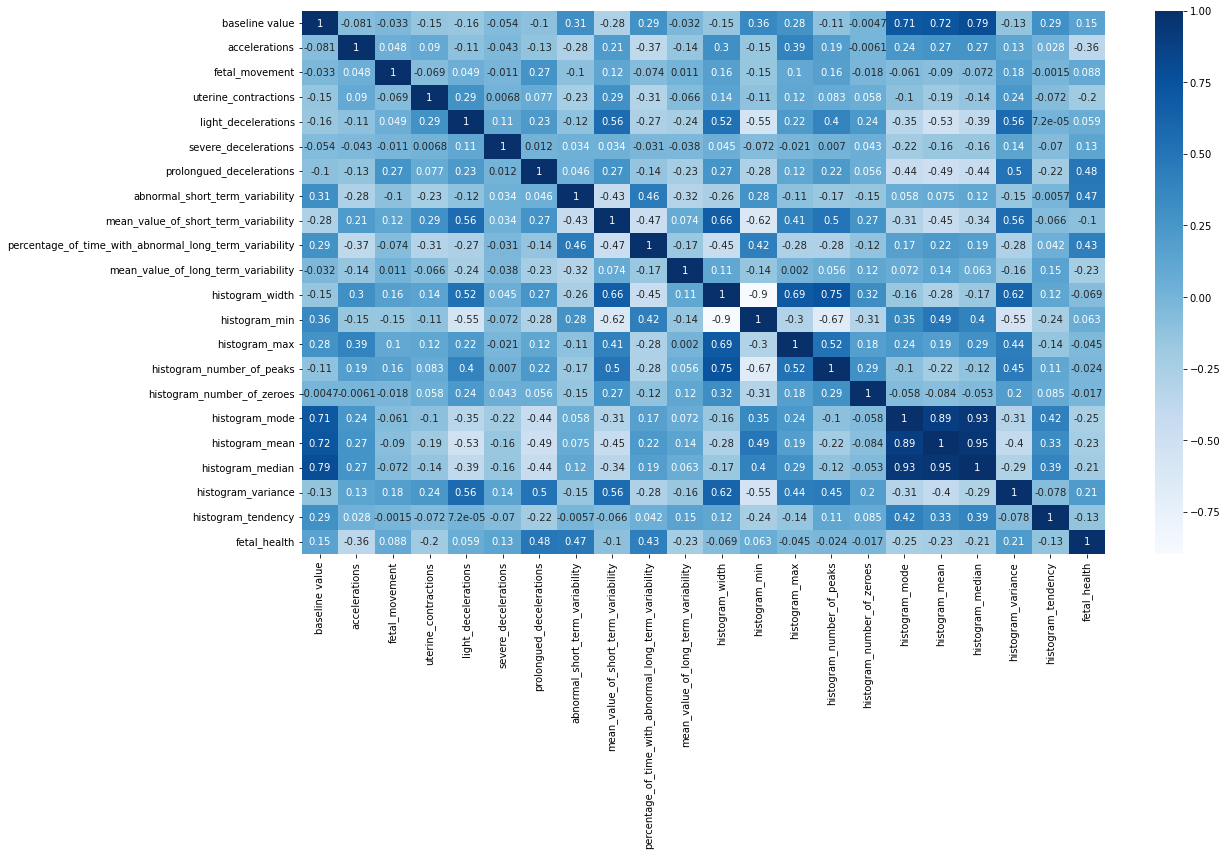

In [10]:
#Correlation
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(), cmap="Blues", annot = True)
plt.show()

In [11]:
# check missing data
df.isnull().sum(axis = 0)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

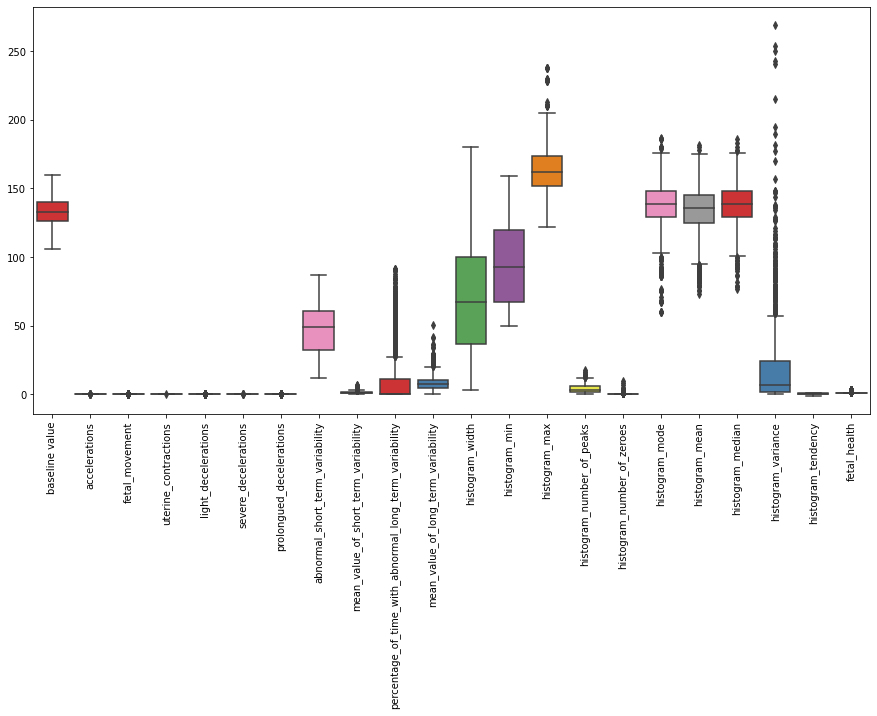

In [12]:
# boxplot - outliers 
plt.figure(figsize=(15,7.5))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [13]:
# function to remove outlier
def removeOutlier(att, data):
    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )
    
    data1 = data[(att > lowerbound) & (att < upperbound)]
    print((data.shape[0] - data1.shape[0]), ' number of outliers from ', data.shape[0] )
    print('\n')
    
    data = data1.copy()
    return data

In [14]:
df = removeOutlier(df.mean_value_of_short_term_variability, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_long_term_variability, df)
df = removeOutlier(df.histogram_max, df)
df = removeOutlier(df.histogram_number_of_peaks, df)
df = removeOutlier(df.histogram_number_of_zeroes, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_variance, df)

lowerbound:  -1.3169394303543316  -------- upperbound:  3.9825085742866007
33  number of outliers from  2126


lowerbound:  -45.50709045903291  -------- upperbound:  65.50135706199517
59  number of outliers from  2093


lowerbound:  -8.329017762964924  -------- upperbound:  24.853403210359204
30  number of outliers from  2034


lowerbound:  111.70085851851438  -------- upperbound:  216.2991414814856
13  number of outliers from  2004


lowerbound:  -4.623236358424442  -------- upperbound:  12.674466895842823
15  number of outliers from  1991


lowerbound:  -1.6005361998856964  -------- upperbound:  2.2118722322743603
20  number of outliers from  1976


lowerbound:  88.70470742824477  -------- upperbound:  186.56011874762436
36  number of outliers from  1956


lowerbound:  91.99943556988936  -------- upperbound:  179.096397763444
18  number of outliers from  1920


lowerbound:  99.84821356792831  -------- upperbound:  178.38207034374358
2  number of outliers from  1902


lowerbound:  -51

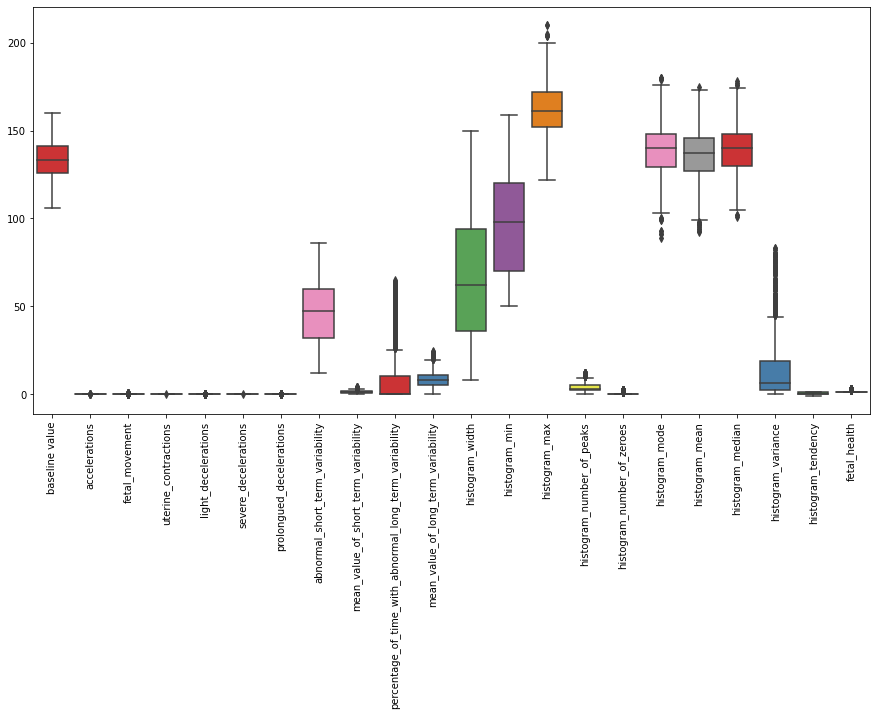

In [15]:
# new boxplot
plt.figure(figsize=(15,7.5))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [16]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [17]:
# Independent Variable (IV)
X = df.drop("fetal_health", axis=1)

# Dependent Variable (DV)   
Y = df["fetal_health"]

In [18]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (1484, 21) (1484,)
Test : (371, 21) (371,)


In [19]:
# normalization is needed if there is multiple IV 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# building model using logistic regression model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("Length of the model classes: ", len(logreg.classes_))
print("Type of the model classes  : ", logreg.classes_)

Length of the model classes:  3
Type of the model classes  :  [1. 2. 3.]


In [22]:
# to see the parameters (default)
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [23]:
print("Intercept (b0)   : ", logreg.intercept_)
print("\nSlope (b1)       : ", logreg.coef_)
print("\nModel accuracy   : ", logreg.score(X_test, y_test)) 

y_pred = logreg.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Intercept (b0)   :  [ 5.52690647  0.20738601 -5.73429248]

Slope (b1)       :  [[-0.47046549  1.67390806 -0.41067786  0.70975971  0.23922387 -0.07907989
  -0.858608   -1.60277904  0.76039119 -0.11748728  0.08124216 -0.06499457
  -0.0631418  -0.25551459  0.17268532 -0.06477591  0.18829686 -0.45693861
   0.55896581 -0.6877555   0.22379885]
 [-1.31058883 -1.36460162  0.03179013  0.03670642  0.00831523 -0.00731748
   0.35632599 -0.66241084 -1.09890191  0.32500216  0.04888145 -0.04362192
   0.02423591 -0.05341641  0.82607846 -0.30207493  1.05613422  0.79431751
   0.43482484 -0.01286813  0.18953779]
 [ 1.78105433 -0.30930644  0.37888774 -0.74646613 -0.2475391   0.08639737
   0.50228201  2.26518988  0.33851073 -0.20751488 -0.13012361  0.10861649
   0.03890589  0.30893101 -0.99876378  0.36685084 -1.24443108 -0.3373789
  -0.99379066  0.70062363 -0.41333664]]

Model accuracy   :  0.9002695417789758

Mean sqaure error:  0.14016172506738545


In [24]:
# building model using stochastic gradient descent (SGD) classification algorithm 
clf = SGDClassifier(loss = 'log', max_iter = 100, alpha = 0.001) 
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log', max_iter=100)

In [25]:
print("Intercept (b0)   : ", clf.intercept_)          
print("\nSlpoe (b1)       : ", clf.coef_)                
print("\nModel accuracy   : ", clf.score(X_test, y_test)) 

y_pred = clf.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Intercept (b0)   :  [  4.54428953  -4.88237943 -24.59847418]

Slpoe (b1)       :  [[-0.15931663  2.80030329 -0.28582583  0.66132975  0.31503101 -0.90163407
  -1.21374116 -1.36105053  0.8487378  -0.47575786  0.00811551  0.05181973
  -0.43724177 -0.66053433 -0.47105835  0.0636409   0.23129853 -0.6208681
  -0.10695546 -0.96886881 -0.16127122]
 [-0.76025053 -2.67193113  0.07027126 -0.50389026 -0.1235598  -0.12143861
   0.18939769  0.50109619 -1.76953391  0.5153996   0.075595    0.09891043
   0.02725485  0.2668354   0.6895174  -0.15289769  1.65671478  0.08080323
   0.12275376  0.3879516   0.04529287]
 [ 3.46961422 -3.93507595  1.72414613 -2.26010048  0.27182787  0.96393178
   2.58753496  6.34843648 -0.56243728 -0.65852496 -0.88970771 -0.87567561
   1.09900588  0.01335882 -3.04949876  1.00167983 -2.25266371 -1.43694354
  -2.03128214  1.55716068 -1.7612864 ]]

Model accuracy   :  0.894878706199461

Mean sqaure error:  0.15363881401617252


In [26]:
#Model Tuning
parameters = {'loss':('hinga', 'log'), 
              'penalty':('l2', 'l1', 'elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1], 
              'max_iter':[1000, 5000, 10000, 20000]}

# build model
gs = SGDClassifier(random_state = 0)
gscv = GridSearchCV(gs, parameters)
gscv.fit(X_train, y_train)

C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._vali

GridSearchCV(estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('hinga', 'log'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [27]:
print("Hpyerparameters  : ",gscv.best_params_) # best parameter
print("\nIntercept (b0)   : ", gscv.best_estimator_.intercept_)          
print("\nSlpoe (b1)       : ", gscv.best_estimator_.coef_)                
print("\nModel accuracy   : ", gscv.best_score_) 

y_pred = gscv.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Hpyerparameters  :  {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}

Intercept (b0)   :  [  4.67327053  -5.09728786 -28.45393351]

Slpoe (b1)       :  [[-4.01800268e-02  2.88592603e+00 -1.44900771e-02  6.37250245e-01
   3.13586317e-01 -1.12845518e+00 -1.14923272e+00 -1.39347441e+00
   8.50628809e-01 -4.98533738e-01  9.06379620e-02  4.84912624e-02
  -4.18547850e-01 -6.34752601e-01 -4.19702951e-01 -6.10798633e-03
   3.79020516e-01 -5.64902342e-01 -2.97791339e-02 -9.82902184e-01
  -7.26864077e-03]
 [-8.52599988e-01 -2.57500726e+00 -1.24503917e-01 -5.49830989e-01
  -7.76201129e-02 -1.19563288e-01  1.39070712e-01  3.86993546e-01
  -1.65369313e+00  3.86131983e-01  3.38554611e-03  1.13583103e-01
   9.35877774e-03  2.67530944e-01  7.18911279e-01 -1.76891260e-01
   1.59090137e+00  9.45283793e-02 -3.55463310e-02  3.56958890e-01
   7.30804732e-02]
 [ 3.85605775e+00 -4.51588471e+00  1.98241819e+00 -2.46135625e+00
   4.55948381e-01  8.10283347e-01  3.25038035e+00  7.28303660e+00


C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


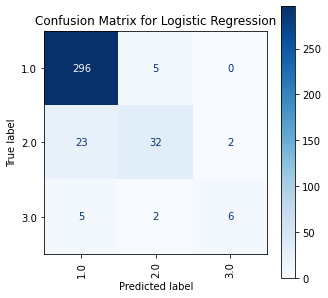

C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


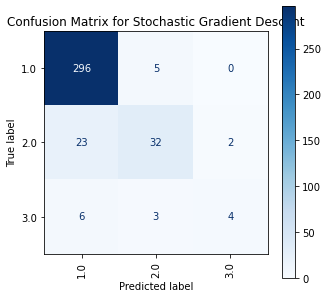

C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


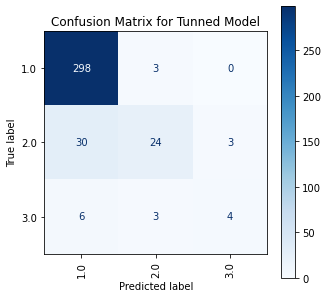

In [28]:
#Model Evaluation
# view the confusion metrix - logistic regression
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(logreg, X_test, y_test, xticks_rotation='vertical', cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# view the confusion metrix - stochastic gradient descent
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Stochastic Gradient Descent")
plt.show()

# view the confusion metrix - tunned model 
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gscv, X_test, y_test, xticks_rotation='vertical', cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Tunned Model")
plt.show()

In [29]:
# gradient descent and Accuracy
preds = logreg.predict(X_test)
print("Accuracy on train data by Logistic Regression: ", accuracy_score(y_train, logreg.predict(X_train))*100)
print("Accuracy on test data by Logistic Regression : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, logreg.predict(X_test)))

# stochastic gradient descent
preds = clf.predict(X_test)
print("Accuracy on train data by Stochastic Gradient Descent: ", accuracy_score(y_train, clf.predict(X_train))*100)
print("Accuracy on test data by Stochastic Gradient Descent : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, clf.predict(X_test)))

# grid search cross validation gradient descent
preds = gscv.predict(X_test)
print("Accuracy on train data by Tuned Model: ", accuracy_score(y_train, gscv.predict(X_train))*100)
print("Accuracy on test data by Tuned Model : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, gscv.predict(X_test)))

Accuracy on train data by Logistic Regression:  92.25067385444744
Accuracy on test data by Logistic Regression :  90.02695417789758 

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.95       301
         2.0       0.82      0.56      0.67        57
         3.0       0.75      0.46      0.57        13

    accuracy                           0.90       371
   macro avg       0.83      0.67      0.73       371
weighted avg       0.89      0.90      0.89       371

Accuracy on train data by Stochastic Gradient Descent:  91.98113207547169
Accuracy on test data by Stochastic Gradient Descent :  89.4878706199461 

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.95       301
         2.0       0.80      0.56      0.66        57
         3.0       0.67      0.31      0.42        13

    accuracy                           0.89       371
   macro avg       0.79      0.62      0.68       371
weighted a